# Police Overtime
## A CS506 project analyzing the trends around BPD overtime budget

In [ ]:
## IMPORTS
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
## DOWNLOAD CSV DATASETS FROM ANALYZE BOSTON

# Create a data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# List of URLs for each year's data
urls = [
    'https://data.boston.gov/datastore/dump/6b3c5333-1dcb-4b3d-9cd7-6a03fb526da7?bom=True',  # 2023
    'https://data.boston.gov/datastore/dump/63ac638b-36c4-487d-9453-1d83eb5090d2?bom=True',  # 2022
    'https://data.boston.gov/datastore/dump/ec5aaf93-1509-4641-9310-28e62e028457?bom=True',  # 2021
    'https://data.boston.gov/datastore/dump/e2e2c23a-6fc7-4456-8751-5321d8aa869b?bom=True',  # 2020
    'https://data.boston.gov/datastore/dump/3bdfe6dc-3a81-49ce-accc-22161e2f7e74?bom=True',  # 2019
    'https://data.boston.gov/datastore/dump/31358fd1-849a-48e0-8285-e813f6efbdf1?bom=True',  # 2018
    'https://data.boston.gov/datastore/dump/70129b87-bd4e-49bb-aa09-77644da73503?bom=True',  # 2017
    'https://data.boston.gov/datastore/dump/8368bd3d-3633-4927-8355-2a2f9811ab4f?bom=True',  # 2016
    'https://data.boston.gov/datastore/dump/2ff6343f-850d-46e7-98d1-aca79b619fd6?bom=True',  # 2015
    'https://data.boston.gov/datastore/dump/941c9de4-fb91-41bb-ad5a-43a35f5dc80f?bom=True'   # 2014
]

# Loop over the URLs and download each CSV
start_year = 2023
for i, url in enumerate(urls):
    year = start_year - i
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        filename = f'data/data_{year}.csv' # Name file by year
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f'Successfully downloaded data for {year}')
    else:
        print(f'Failed to download data for {year}. Status code: {response.status_code}')

# Load and combine all CSVs into a single DataFrame
dataframes = []
for year in range(2023, 2013, -1):
    df = pd.read_csv(f'data/data_{year}.csv')
    df['year'] = year  # Add a column for the year
    dataframes.append(df)

# Combine all DataFrames into one
all_data = pd.concat(dataframes, ignore_index=True)

# Display the combined data
print(all_data.head())


From the add_data.head() above, we can see that due to each csv file having a different naming convention for headers, the data is a mess. The first step of the data cleaning is thus to standardize the data headers.

In [ ]:
## ADD YEAR COLUMN TO EACH CSV FILE
data_dir = 'data'

# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        # Extract the year from the filename
        year = filename.split('_')[1].split('.')[0]
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Check if 'year' column exists, and if not, add it
        if 'year' not in df.columns:
            df['year'] = int(year)
            # Save the updated DataFrame back to the CSV file
            df.to_csv(file_path, index=False)
            print(f"Added 'year' column to {filename}")
        else:
            print(f"'year' column already exists in {filename}")


In [ ]:
## ANALYZE CSV FILE HEADERS

# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        # Extract the year from the filename
        year = filename.split('_')[1].split('.')[0]
        
        # Read only the header row
        df = pd.read_csv(os.path.join(data_dir, filename), nrows=0)
        
        # Store the headers in the dictionary
        headers_dict[year] = list(df.columns)

# Display all headers for each year
for year, headers in headers_dict.items():
    print(f"Year: {year}, Headers: {headers}")
    print("-" * 80)

In [ ]:
## STANDARDIZE COLUMN NAMES

# Target headers mapping to standardize all headers to the 2023 version
target_headers = {
    '_id': '_id',
    'NAME': 'NAME',
    'TITLE': 'TITLE',
    'DEPARTMENT NAME': 'DEPARTMENT_NAME',
    'DEPARTMENT_NAME': 'DEPARTMENT_NAME',
    'REGULAR': 'REGULAR',
    'RETRO': 'RETRO',
    'OTHER': 'OTHER',
    'OVERTIME': 'OVERTIME',
    'INJURED': 'INJURED',
    'DETAIL': 'DETAIL',
    'DETAILS': 'DETAIL',
    'QUINN': 'QUINN_EDUCATION',
    'QUINN/EDUCATION INCENTIVE': 'QUINN_EDUCATION',
    'QUINN / EDUCATION INCENTIVE': 'QUINN_EDUCATION',
    'QUINN_EDUCATION_INCENTIVE': 'QUINN_EDUCATION',
    'QUINN_EDUCATION': 'QUINN_EDUCATION',
    'TOTAL EARNINGS': 'TOTAL_GROSS',
    'TOTAL_ GROSS': 'TOTAL_GROSS',
    'TOTAL GROSS': 'TOTAL_GROSS',
    'ZIP': 'POSTAL',
    'POSTAL': 'POSTAL',
    'year': 'year'
}

# Standardize headers for each CSV file
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_dir, filename)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Rename columns according to target headers
        df.rename(columns=target_headers, inplace=True)
        
        # Save the updated DataFrame back to the CSV file
        df.to_csv(file_path, index=False)
        print(f"Standardized headers for {filename}")


In [ ]:
## CHECK CSV HEADERS AFTER STANDARDIZATION

# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        # Extract the year from the filename
        year = filename.split('_')[1].split('.')[0]
        
        # Read only the header row
        df = pd.read_csv(os.path.join(data_dir, filename), nrows=0)
        
        # Store the headers in the dictionary
        headers_dict[year] = list(df.columns)

# Display all headers for each year
for year, headers in headers_dict.items():
    print(f"Year: {year}, Headers: {headers}")
    print("-" * 80)

With the data now being standardized across years, because the employee earnings data contains data for every public servant under the payroll of Boston, we need to extract the data only related to BPD (DEPARTMENT_NAME="Boston Police Department").

In [ ]:
## EXTRACT DATA RELATED TO BPD

# Initialize an empty list to store filtered DataFrames
bpd_data = []

# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_dir, filename)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Check if 'DEPARTMENT_NAME' column exists (in case of unexpected missing columns)
        if 'DEPARTMENT_NAME' in df.columns:
            # Filter rows where DEPARTMENT_NAME is "Boston Police Department"
            bpd_df = df[df['DEPARTMENT_NAME'] == "Boston Police Department"]
            # Append the filtered data to the list
            bpd_data.append(bpd_df)
        else:
            print(f"DEPARTMENT_NAME column missing in {filename}")

# Concatenate all filtered DataFrames
merged_bpd_data = pd.concat(bpd_data, ignore_index=True)

# Save the merged DataFrame to a CSV file
merged_bpd_data.to_csv('BPD_salary.csv', index=False)
print("Merged data saved to BPD_salary.csv")


After this, there is still a problem with the numerical data columns, as some are prefixed with the `$` symbol and some are not. For easy data processing in the future, let us remove the use of `$` symbols altogether and convert the columns to a float type.

NOTE:
There is also an abnormal row with an abnormal salary that we took account of:  
16,"Hartgrove,Christopher A",Police Detective,Boston Police Department,($380.71),$174.05 ,"$16,078.64 ",,"$106,392.37 ",,,"$122,264.35 ",2066,2017


In [21]:
## REMOVE $ SYMBOLS FROM SALARY COLUMNS

# Load the merged data
bpd_data = pd.read_csv('BPD_salary.csv')

# List of salary categories to clean
salary_categories = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS']

# Clean each salary category column
for category in salary_categories:
    if category in bpd_data.columns:
        # Remove '$' symbol and handle negative values in parentheses
        bpd_data[category] = bpd_data[category].replace('[\$,]', '', regex=True)  # Remove $ symbol
        bpd_data[category] = bpd_data[category].replace(r'\(([^)]+)\)', r'-\1', regex=True)  # Convert (value) to -value
        bpd_data[category] = pd.to_numeric(bpd_data[category], errors='coerce')  # Convert to float, setting non-numeric values to NaN

# Save the cleaned data back to the file
bpd_data.to_csv('BPD_salary.csv', index=False)
print("Standardized salary columns in BPD_salary.csv, handling $ symbols and negative values in parentheses")


Standardized salary columns in BPD_salary.csv, handling $ symbols and negative values in parentheses


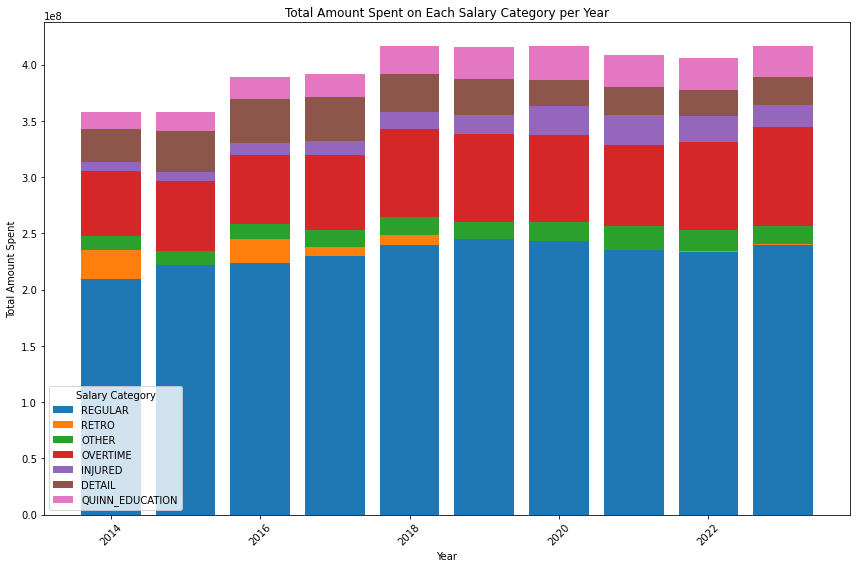

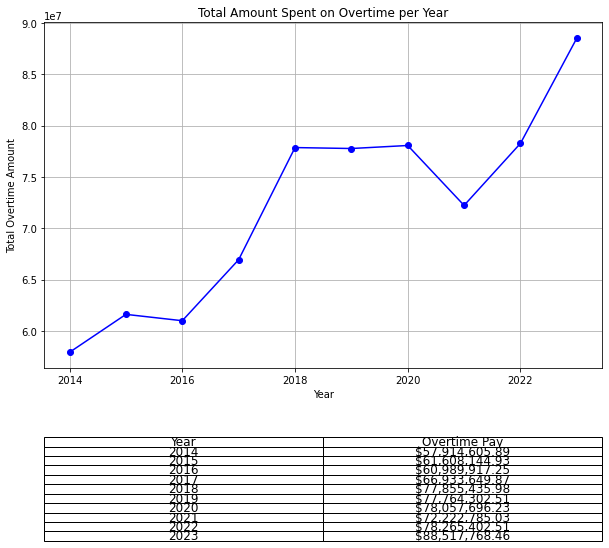

In [25]:
## PLOT GENERAL AND OVERTIME SALARY TREND

# Load the merged data
bpd_data = pd.read_csv('BPD_salary.csv')

# List of salary categories to analyze
salary_categories = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION']

# Group by 'year' and calculate the total amount spent for each salary category
yearly_totals = bpd_data.groupby('year')[salary_categories].sum()

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))
bottom = None  # For stacking bars

# Iterate through each category to plot each as a stacked component
for category in salary_categories:
    if bottom is None:
        bottom = yearly_totals[category]
        plt.bar(yearly_totals.index, yearly_totals[category], label=category)
    else:
        plt.bar(yearly_totals.index, yearly_totals[category], bottom=bottom, label=category)
        bottom += yearly_totals[category]  # Update the bottom position for stacking

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent on Each Salary Category per Year')
plt.legend(title="Salary Category")
plt.xticks(rotation=45)  # Rotate year labels if necessary
plt.tight_layout()

# Show the plot
plt.show()

# Group by 'year' and calculate the total amount spent on overtime
overtime_totals = bpd_data.groupby('year')['OVERTIME'].sum()

# Create a figure with two subplots: one for the plot and one for the table
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the overtime totals
ax.plot(overtime_totals.index, overtime_totals.values, marker='o', linestyle='-', color='b', label='Overtime')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Overtime Amount')
ax.set_title('Total Amount Spent on Overtime per Year')
ax.grid(True)

# Prepare the table data
table_data = [[year, f"${amount:,.2f}"] for year, amount in zip(overtime_totals.index, overtime_totals.values)]
column_labels = ["Year", "Overtime Pay"]

# Create a larger table and increase font size
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust layout to make room for the larger table
plt.subplots_adjust(bottom=0.4)

# Display the plot with the larger table
plt.show()


